In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Target Variable : Survived
##  Independent Variable : Others

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handling Missing Values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Age -- NaN replacing with Mean
df.Age.replace(np.NaN,df.Age.mean(),inplace=True)

In [7]:
# Embarked -- NaN replacing with Maximum Weigthed Category
df.Embarked.replace(np.NaN,df.Embarked.value_counts().index[0],inplace=True)


In [8]:
# Cabin -- Dropping Cabin as feature as there are more number of NaN values
df.drop(columns=df[['Cabin']],inplace=True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Handling Outliers

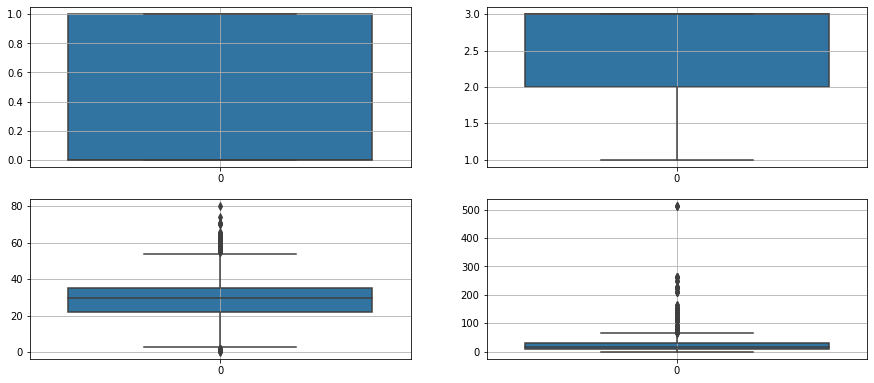

In [10]:
# plotting box plot for all independent variables to see the outliers for all
# temporarily for now keeping all the outliers 

plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.boxplot(df['Survived'])
plt.grid()

plt.subplot(3,2,2)
sns.boxplot(df['Pclass'])
plt.grid()

plt.subplot(3,2,3)
sns.boxplot(df['Age'])
plt.grid()

plt.subplot(3,2,4)
sns.boxplot(df['Fare'])
plt.grid()

plt.show()

In [11]:
print("___Age___")
print(f"Age 2.5 & below ==> { len(df[(df.Age <= 2.5) ]) } records " )
print(f"Age 50-60 ==> { len(df[(df.Age > 50) & (df.Age < 60)]) } records " )
print(f"Age 60-70 ==> { len(df[(df.Age > 60) & (df.Age < 70)]) } records " )
print(f"Age 70 & above ==> { len(df[(df.Age >= 70) ]) } records " )

print("\n___Fare___")
print(f"Fare 80-100 ==> { len(df[(df.Fare > 80) & (df.Fare < 100)]) } records " )
print(f"Fare 100-200 ==> { len(df[(df.Fare > 100) & (df.Fare < 200)]) } records " )
print(f"Fare 200 & above ==> { len(df[(df.Fare >= 200)]) } records " )


___Age___
Age 2.5 & below ==> 24 records 
Age 50-60 ==> 38 records 
Age 60-70 ==> 15 records 
Age 70 & above ==> 7 records 

___Fare___
Fare 80-100 ==> 21 records 
Fare 100-200 ==> 33 records 
Fare 200 & above ==> 20 records 


# Handling Categorial Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
# sex -- LabelEncoding
df.Sex = LE.fit_transform(df.Sex)
df.Sex.astype("int64")

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [14]:
# Embarked -- LabelEncoding
df.Embarked = LE.fit_transform(df.Embarked)
df.Embarked.astype("int64")

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(2)
memory usage: 69.7+ KB


# Misc Analysis

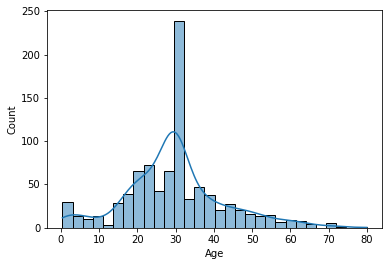

In [16]:
# ==> Age is similar to Normally Distributed

sns.histplot(df.Age,kde=True)
# plt.plot(,color="red")
plt.show()

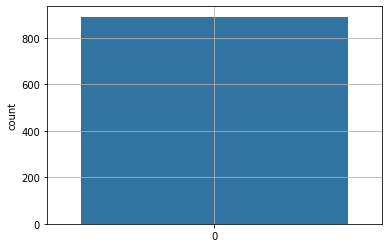

In [17]:
# ==> Best chance of Survival in Titanic is in 1-3-2 Pclass order

sns.countplot(df["Embarked"])
plt.grid()
plt.show()

In [18]:
def get_percentage(x):
    return round((int(x)/891)*100,2)

# 1 - Survived

out of 891 passengers only 342 passengers survived ie. 38.38 %


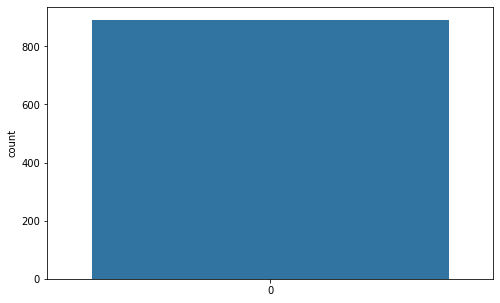

In [19]:
# count of Die / Survive
plt.figure(figsize=(8,5))
sns.countplot(df.Survived)
people_survived  = (df.Survived == 1).sum()
print(f"out of 891 passengers only {people_survived} passengers survived ie. {get_percentage(people_survived)} %")

In [20]:
# class wise survival
get_per = lambda x : round( ( x / x.sum() )*100 , 1 )

plt.figure(figsize=(10,5))
sns.countplot(df.Survived,hue=df.Pclass)
print(pd.crosstab(df.Pclass,df.Survived).apply(get_per, axis=1))
plt.grid()
plt.show()

ValueError: Cannot use `hue` without `x` and `y`

<Figure size 720x360 with 0 Axes>

In [ ]:
# sex wise survival
get_per = lambda x : round( ( x / x.sum() )*100 , 1 )

plt.figure(figsize=(10,5))
sns.countplot(df.Survived,hue=df.Sex)
print(pd.crosstab(df.Sex,df.Survived).apply(get_per, axis=1))
plt.grid()
plt.show()

In [ ]:
# age wise survival
plt.figure(figsize=(10,5))
sns.distplot(df[df.Survived == 0]["Age"])     # Blue : Died
sns.distplot(df[df.Survived == 1]["Age"])     # Red  : Survived

In [ ]:
# TravelSize wise survival
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df[df.Survived == 0]["SibSp"])     # Blue : Died
sns.distplot(df[df.Survived == 1]["SibSp"])     # Red  : Survived

plt.subplot(1,2,2)
sns.distplot(df[df.Survived == 0]["Parch"])     # Blue : Died
sns.distplot(df[df.Survived == 1]["Parch"])     # Red  : Survived

In [ ]:
# Fare wise survival
plt.figure(figsize=(10,5))

sns.distplot(df[df.Survived == 0]["Fare"])     # Blue : Died
sns.distplot(df[df.Survived == 1]["Fare"])     # Red  : Survived


In [ ]:
# Embarked with Survival
get_per = lambda x : round( ( x / x.sum() )*100 , 1 )

plt.figure(figsize=(10,5))
sns.countplot(df.Survived,hue=df.Embarked)
print(pd.crosstab(df.Embarked,df.Survived).apply(get_per, axis=1))
plt.grid()
plt.show()

# Conclussion

- Pclass  1 has more survival rate
- Female has more chances of survival
- Before 18 and after 35 age the chances of surviaval are good
- Travelling Single/Dual(0-2) with 1-2 child is safer
- buying ticket of $40 increases your chance of survival
- Going to "S" Destination has more chances of survival

# 2 - Pclass

In [ ]:
# Sex wise Pclass

get_per = lambda x : round( ( x / x.sum() )*100 , 1 )

plt.figure(figsize=(10,5))
sns.countplot(df.Pclass,hue=df.Sex)
print(pd.crosstab(df.Sex,df.Pclass).apply(get_per, axis=1))
plt.grid()
plt.show()

In [ ]:
# Age wise Pclass

sns.distplot(df[df["Pclass"] == 1]["Age"],color="b")
sns.distplot(df[df["Pclass"] == 2]["Age"],color="r")
sns.distplot(df[df["Pclass"] == 3]["Age"],color="g")

In [ ]:
# TravelSize wise Pclass

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df[df["Pclass"] == 1]["SibSp"],color="r")
sns.distplot(df[df["Pclass"] == 2]["SibSp"],color="g")
sns.distplot(df[df["Pclass"] == 3]["SibSp"],color="b")

plt.subplot(1,2,2)
sns.distplot(df[df["Pclass"] == 1]["Parch"],color="r")
sns.distplot(df[df["Pclass"] == 2]["Parch"],color="g")
sns.distplot(df[df["Pclass"] == 3]["Parch"],color="b")

In [ ]:
# Fare wise Pclass
plt.figure(figsize=(10,5))

sns.distplot(df[df.Pclass == 1]["Fare"],color="r")     
sns.distplot(df[df.Pclass == 2]["Fare"],color="g")     
sns.distplot(df[df.Pclass == 3]["Fare"],color="b")     



In [ ]:
# Embarked with Pclass
get_per = lambda x : round( ( x / x.sum() )*100 , 1 )

plt.figure(figsize=(10,5))
sns.countplot(df.Pclass,hue=df.Embarked)
print(pd.crosstab(df.Embarked,df.Pclass).apply(get_per, axis=1))
plt.grid()
plt.show()

In [ ]:
LE.classes_

# Conclusion

- Pclass 3 has more female than male
- Age wise Pclass 
        1 ==> Age 20 and up
        2 ==> similar to Normally Distribution(people of all age are in Pclass 2)    
        3 ==> Age 0 to 50
-TravelSize wise Pclass

    SibSp
        Pclass 1 & 2 trace each other (may be they are in same price segment)
        Pclass 3 is majorly elongated 
    Parch
        Pclass 3 was majorly for alone people -- max(5)
        Pclass 2 has majority of 1 Parch -- max(4)
        Pclass 1 has majority of 2 parch -- max(3)
        
- Pclss costing 1 > 2 > 3
- People gooin to city "S" were more in all the 3 classes as compared to other destination ie.( S > C > Q )

# 3 - Sex

In [ ]:
# Analysis for Age column based upon their Sex
print("___Male___")
print("Mean : ",df[df['Sex'] == "0"]["Age"].mean())
print("Median : ",df[df['Sex'] == "1"]["Age"].median())
print("___Female___")
print("Mean : ",df[df['Sex'] == "0"]["Age"].mean())
print("Median : ",df[df['Sex'] == "1"]["Age"].median())
print(df.Age.mean())

sns.distplot(df[df.Sex == 0]["Age"],color="r")     
sns.distplot(df[df.Sex == 1]["Age"],color="b")     


In [ ]:
# travel size by sex

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df[df["Sex"] == 0]["SibSp"],color="r")
sns.distplot(df[df["Sex"] == 1]["SibSp"],color="g")


plt.subplot(1,2,2)
sns.distplot(df[df["Sex"] == 0]["Parch"],color="r")
sns.distplot(df[df["Sex"] == 1]["Parch"],color="g")

In [ ]:
# Fare by Sex
plt.figure(figsize=(10,5))

sns.distplot(df[df.Sex == 0]["Fare"],color="r")     
sns.distplot(df[df.Sex == 1]["Fare"],color="g")     


In [ ]:
# Embarked with Sex
get_per = lambda x : round( ( x / x.sum() )*100 , 1 )

plt.figure(figsize=(10,5))
sns.countplot(df.Sex,hue=df.Embarked)
print(pd.crosstab(df.Embarked,df.Sex).apply(get_per, axis=1))
plt.grid()
plt.show()

# conclusion

- below age 20 ratio of female is more , age 20-35 male are more, above 35 ratio is close to one another
- Travel Wise
        SibSp
            male travel alone more than female
        Parch
            female travels more with rgier family
- female paid more fare price than male
- for all Destination majority was of female

# 4 - Age 

In [ ]:
# Age by destination
plt.figure(figsize=(10,5))
sns.countplot(df.Age,hue=df.Embarked)
plt.grid()
plt.show()

# conclusion

- age 25-75 more people were goin to destination "S"
- destination "C" & "Q" were throughtout distributed

# 5 - TravelSize

In [ ]:
# Age by destination
get_per = lambda x : round( ( x / x.sum() )*100 , 1 )



plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df.SibSp,hue=df.Embarked)
print(pd.crosstab(df.Embarked,df.SibSp).apply(get_per, axis=1))

print("-----------------------------------------------")
plt.subplot(1,2,2)
sns.countplot(df.Parch,hue=df.Embarked)
print(pd.crosstab(df.Embarked,df.Parch).apply(get_per, axis=1))

plt.grid()
plt.show()

# Conclusion

- SibSp & Parch ( 2 > 1 > 0 )
    
    

In [ ]:
df.corr()